In [1]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np

data = pd.read_csv('new_data.csv', sep=',')

In [2]:
print (data)

    X  y  class
0   1  2      0
1   1  3      0
2   2  2      0
3   2  3      1
4   2  4      0
5   3  1      0
6   3  2      0
7   3  3      1
8   3  4      1
9   4  2      1
10  4  3      1
11  4  4      0


In [3]:
negative_data = data.loc[data['class']==0]
positive_data = data.loc[data['class']==1]

In [4]:
all_data = pd.concat([negative_data,positive_data])

In [5]:
X = all_data.drop('class', axis=1)
y = all_data['class']

In [6]:
#implement SVM

svm = SVC(gamma=1, C=1, kernel='rbf')
svm.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

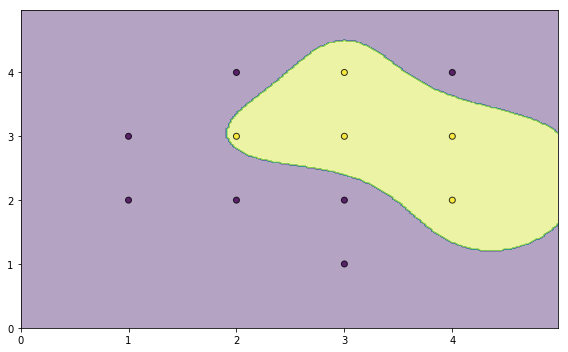

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,figsize=(8,5))

classifier = svm.fit(X,y)
plot_decision_function(X.values,y.values,classifier,ax)
fig.tight_layout()
